In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from narwhals import read_csv


In [11]:
df = pd.read_csv('/Users/mac/PycharmProjects/Customer_Churn/explored_data.csv')

In [12]:
df.head()

,customer_id,total_amount_spent,number_of_transactions,no_electronics,no_furniture,no_clothing,no_groceries,no_books,days_since_last_purchase,average_spent,...,no_unresolved,no_interactions,recency,complaint_rate,unresolution_rate,feedback_rate,login_frequency,service_usage,days_since_last_login,churn_status
0,1,416.50,1,1,0,0,0,0,1278,416.50000,...,0.0,1.0,1269.0,0.0,0.0,0.0,34,Mobile App,705,0
1,2,1547.42,7,3,1,2,1,0,1041,221.06000,...,0.0,1.0,1283.0,0.0,0.0,0.0,5,Website,660,1
2,3,1702.98,6,0,2,1,2,1,1083,283.83000,...,0.0,1.0,1123.0,0.0,0.0,0.0,3,Website,680,0
3,4,917.29,5,2,1,1,1,0,1003,183.45800,...,1.0,2.0,1037.0,0.0,0.5,0.0,2,Website,762,0
4,5,2001.49,8,3,2,0,3,0,1009,250.18625,...,0.0,0.0,0.0,0.0,0.0,0.0,41,Website,699,0


In [15]:
## df_encoded = pd.get_dummies(df, columns=['service_usage'], drop_first=False)


df = df.replace({'True': 1, 'False': 0})

df


,customer_id,total_amount_spent,number_of_transactions,no_electronics,no_furniture,no_clothing,no_groceries,no_books,days_since_last_purchase,average_spent,...,recency,complaint_rate,unresolution_rate,feedback_rate,login_frequency,days_since_last_login,churn_status,service_usage_Mobile App,service_usage_Online Banking,service_usage_Website
0,1,416.50,1,1,0,0,0,0,1278,416.500000,...,1269.0,0.0,0.0,0.0,34,705,0,True,False,False
1,2,1547.42,7,3,1,2,1,0,1041,221.060000,...,1283.0,0.0,0.0,0.0,5,660,1,False,False,True
2,3,1702.98,6,0,2,1,2,1,1083,283.830000,...,1123.0,0.0,0.0,0.0,3,680,0,False,False,True
3,4,917.29,5,2,1,1,1,0,1003,183.458000,...,1037.0,0.0,0.5,0.0,2,762,0,False,False,True
4,5,2001.49,8,3,2,0,3,0,1009,250.186250,...,0.0,0.0,0.0,0.0,41,699,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,227.25,1,0,0,0,0,1,1159,227.250000,...,0.0,0.0,0.0,0.0,38,970,0,True,False,False
996,997,419.82,2,1,1,0,0,0,1066,209.910000,...,0.0,0.0,0.0,0.0,5,908,0,True,False,False
997,998,252.15,1,0,0,0,0,1,1103,252.150000,...,0.0,0.0,0.0,0.0,47,808,0,False,False,True
998,999,2393.26,9,2,4,0,2,1,1023,265.917778,...,0.0,0.0,0.0,0.0,23,991,0,False,False,True


In [28]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
cols_to_scale = df.columns.drop(['churn_status', 'customer_id'])
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[cols_to_scale])

df_scaled = pd.DataFrame(df_scaled, columns=cols_to_scale)
df_scaled.head(10)

,total_amount_spent,number_of_transactions,no_electronics,no_furniture,no_clothing,no_groceries,no_books,days_since_last_purchase,average_spent,account_age,...,no_interactions,recency,complaint_rate,unresolution_rate,feedback_rate,login_frequency,days_since_last_login,service_usage_Mobile App,service_usage_Online Banking,service_usage_Website
0,0.120459,0.000,0.166667,0.000000,0.000000,0.00,0.000000,0.785915,0.834787,0.000000,...,0.5,0.937223,0.0,0.0,0.0,0.687500,0.195055,1.0,0.0,0.0
1,0.455424,0.750,0.500000,0.166667,0.333333,0.25,0.000000,0.118310,0.433630,0.869806,...,0.5,0.947563,0.0,0.0,0.0,0.083333,0.071429,0.0,0.0,1.0
2,0.501499,0.625,0.000000,0.333333,0.166667,0.50,0.166667,0.236620,0.562470,0.662050,...,0.5,0.829394,0.0,0.0,0.0,0.041667,0.126374,0.0,0.0,1.0
3,0.268787,0.500,0.333333,0.166667,0.166667,0.25,0.000000,0.011268,0.356448,0.606648,...,1.0,0.765879,0.0,0.5,0.0,0.020833,0.351648,0.0,0.0,1.0
4,0.589914,0.875,0.500000,0.333333,0.000000,0.75,0.000000,0.028169,0.493414,0.839335,...,0.0,0.000000,0.0,0.0,0.0,0.833333,0.178571,0.0,0.0,1.0
5,0.341945,0.500,0.166667,0.333333,0.166667,0.00,0.166667,0.177465,0.457846,0.326870,...,0.5,0.911374,0.0,0.0,1.0,0.020833,0.288462,0.0,0.0,1.0
6,0.022786,0.000,0.000000,0.000000,0.000000,0.00,0.166667,0.191549,0.157906,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.645833,0.983516,1.0,0.0,0.0
7,0.603358,0.750,0.166667,0.333333,0.333333,0.00,0.333333,0.146479,0.580085,0.675900,...,1.0,0.814623,0.0,1.0,0.5,0.333333,0.695055,0.0,1.0,0.0
8,0.387247,0.500,0.166667,0.000000,0.333333,0.50,0.000000,0.205634,0.520635,0.772853,...,0.5,0.836041,0.0,0.0,0.0,0.479167,0.513736,0.0,0.0,1.0
9,0.410978,0.750,0.166667,0.500000,0.166667,0.50,0.000000,0.171831,0.389628,0.789474,...,0.0,0.000000,0.0,0.0,0.0,0.583333,0.967033,0.0,1.0,0.0


In [17]:
X = df_scaled
y = df['churn_status']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from imblearn.combine import SMOTEENN, SMOTETomek

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

/Users/mac/PycharmProjects/book-recommender/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mac/PycharmProjects/book-recommender/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mac/PycharmProjects/book-recommender/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer

In [20]:
len(X_train.columns)

26

In [21]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_resampled.shape[1],)),
    keras.layers.Dropout(0.3),  # helps prevent overfitting
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_resampled, y_resampled, epochs=50, class_weight={0:1.0, 1:3.0})

2025-09-26 10:32:39.180034: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/mac/PycharmProjects/book-recommender/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/mac/PycharmProjects/book-recommender/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6827 - loss: 1.2437
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - loss: 0.9548
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.9351
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6713 - loss: 0.9347
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6830 - loss: 0.9094
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6437 - loss: 0.9662
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7056 - loss: 0.8690 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6719 - loss: 0.9040 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6938 - loss: 0.8415 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6886 - loss: 0.8298
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 0.8391 
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6920 

In [22]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4675 - loss: 2.1718  


[2.105818271636963, 0.46000000834465027]

In [23]:
yp = model.predict(X_test)
yp[:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.04024561],
       [0.07325941],
       [0.6194349 ],
       [0.6171506 ],
       [0.24501462]], dtype=float32)

In [43]:
y_pred = []
for p in yp:
    if p >= 0.7:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [45]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[76 83]
 [13 28]]
              precision    recall  f1-score   support

           0       0.85      0.48      0.61       159
           1       0.25      0.68      0.37        41

    accuracy                           0.52       200
   macro avg       0.55      0.58      0.49       200
weighted avg       0.73      0.52      0.56       200



In [46]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

[[92 67]
 [19 22]]
              precision    recall  f1-score   support

           0       0.83      0.58      0.68       159
           1       0.25      0.54      0.34        41

    accuracy                           0.57       200
   macro avg       0.54      0.56      0.51       200
weighted avg       0.71      0.57      0.61       200



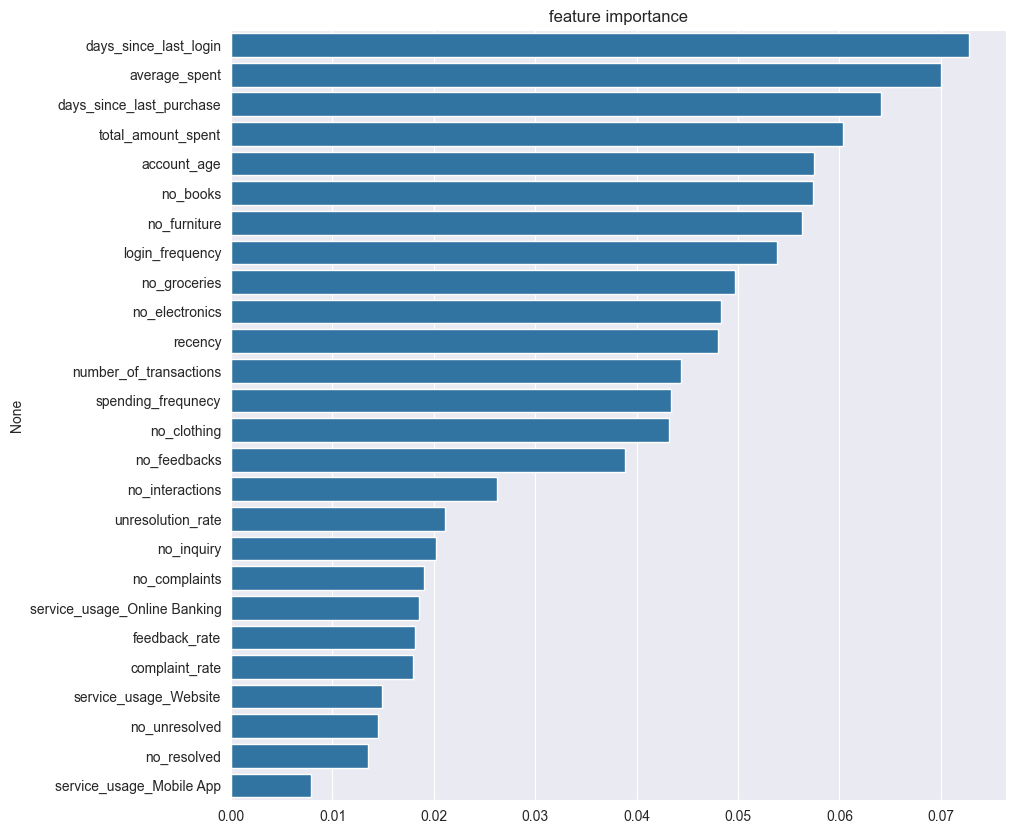

In [47]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

importance = model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize = (10,10))
sns.barplot(x=importance[indices], y=X.columns[indices])
plt.title('feature importance')
plt.show()

In [93]:
column_names = ['total_amount_spent',
       'days_since_last_purchase', 'average_spent', 'account_age', 'recency',
       'login_frequency', 'days_since_last_login','no_groceries','spending_frequnecy','no_clothing','no_books','no_furniture']

df_new = df_scaled[column_names]
df_new.head()


,total_amount_spent,days_since_last_purchase,average_spent,account_age,recency,login_frequency,days_since_last_login,no_groceries,spending_frequnecy,no_clothing,no_books,no_furniture
0,0.120459,0.785915,0.834787,0.000000,0.937223,0.687500,0.195055,0.00,0.000000,0.000000,0.000000,0.000000
1,0.455424,0.118310,0.433630,0.869806,0.947563,0.083333,0.071429,0.25,0.022293,0.333333,0.000000,0.166667
2,0.501499,0.236620,0.562470,0.662050,0.829394,0.041667,0.126374,0.50,0.025105,0.166667,0.166667,0.333333
3,0.268787,0.011268,0.356448,0.606648,0.765879,0.020833,0.351648,0.25,0.022831,0.166667,0.000000,0.166667
4,0.589914,0.028169,0.493414,0.839335,0.000000,0.833333,0.178571,0.75,0.026403,0.000000,0.000000,0.333333


In [94]:
X = df_new
y = df['churn_status']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from imblearn.combine import SMOTEENN, SMOTETomek

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

/Users/mac/PycharmProjects/book-recommender/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mac/PycharmProjects/book-recommender/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/mac/PycharmProjects/book-recommender/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer

In [101]:
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

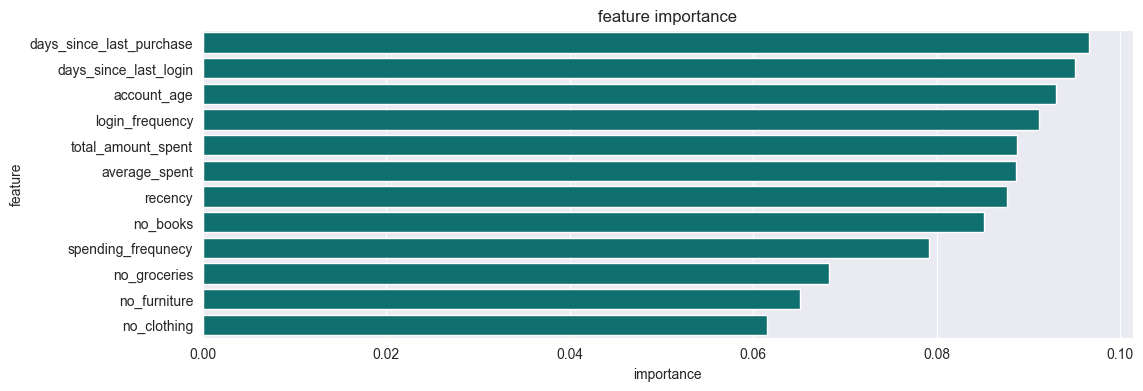

In [114]:
y_pred = model.predict(X_test)

importance = model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize = (12,4))
sns.barplot(x=importance[indices], y=X.columns[indices], color="teal")
plt.xlabel('importance')
plt.ylabel('feature')
plt.title('feature importance')
plt.show()

In [113]:
y_pred = []
for p in yp:
    if p >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[61 98]
 [10 31]]
              precision    recall  f1-score   support

           0       0.86      0.38      0.53       159
           1       0.24      0.76      0.36        41

    accuracy                           0.46       200
   macro avg       0.55      0.57      0.45       200
weighted avg       0.73      0.46      0.50       200

